# ROC曲线

绘制每个类别的ROC曲线，计算AUC值。

同济子豪兄：https://space.bilibili.com/1900783

## 进入 mmclassification 目录

In [1]:
import os
os.chdir('mmclassification')

## 设置Matplotlib中文字体

In [1]:
# # windows操作系统
# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
# plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [2]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

In [2]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果遇到 SSL 相关报错，重新运行本代码块即可
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
!rm -rf /home/featurize/.cache/matplotlib

import matplotlib
matplotlib.rc("font",family='SimHei') # 中文字体

--2022-08-23 09:20:29--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf
Connecting to 172.16.0.13:5848... connected.
Proxy request sent, awaiting response... 200 OK
Length: 10050868 (9.6M) [application/x-font-ttf]
Saving to: ‘/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf’

/environment/minico 100%[===================>]   9.58M  17.4MB/s    in 0.5s    

2022-08-23 09:20:30 (17.4 MB/s) - ‘/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf’ saved [10050868/10050868]



## 导入工具包

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## 载入类别名称和ID

In [4]:
idx_to_labels = np.load('idx_to_labels.npy', allow_pickle=True).item()
# 获得类别名称
classes = list(idx_to_labels.values())
print(classes)

['哈密瓜', '圣女果', '山竹', '杨梅', '柚子', '柠檬', '桂圆', '梨', '椰子', '榴莲', '火龙果', '猕猴桃', '石榴', '砂糖橘', '胡萝卜', '脐橙', '芒果', '苦瓜', '苹果-红', '苹果-青', '草莓', '荔枝', '菠萝', '葡萄-白', '葡萄-红', '西瓜', '西红柿', '车厘子', '香蕉', '黄瓜']


## 载入测试集预测结果表格

In [5]:
df = pd.read_csv('work_dirs/mobilenet_v2_1x_fruit30/测试集预测结果.csv')

In [6]:
df.head()

,图像路径,标注类别名称,标注类别ID,top-1-预测ID,top-1-预测名称,top-2-预测ID,top-2-预测名称,top-3-预测ID,top-3-预测名称,top-n预测正确,...,草莓-预测置信度,荔枝-预测置信度,菠萝-预测置信度,葡萄-白-预测置信度,葡萄-红-预测置信度,西瓜-预测置信度,西红柿-预测置信度,车厘子-预测置信度,香蕉-预测置信度,黄瓜-预测置信度
0,fruit30_split/val/苦瓜/161.jpg,苦瓜,17,17.0,苦瓜,14.0,胡萝卜,23.0,葡萄-白,1.0,...,0.001597,1.300516e-06,4.565059e-07,0.001999,4.944520e-04,4.040559e-05,1.985327e-04,1.293132e-07,4.450464e-07,8.378662e-05
1,fruit30_split/val/苦瓜/158.jpg,苦瓜,17,17.0,苦瓜,23.0,葡萄-白,29.0,黄瓜,1.0,...,0.000020,1.148556e-07,1.931659e-07,0.010118,1.288236e-05,3.079307e-06,3.649963e-06,1.672791e-08,7.884714e-07,2.289558e-04
2,fruit30_split/val/苦瓜/148.jpg,苦瓜,17,17.0,苦瓜,14.0,胡萝卜,29.0,黄瓜,1.0,...,0.000020,9.969936e-09,1.933638e-07,0.000011,2.079129e-07,3.513297e-05,2.743521e-07,5.043417e-10,4.636924e-07,2.881152e-04
3,fruit30_split/val/苦瓜/183.jpg,苦瓜,17,17.0,苦瓜,23.0,葡萄-白,14.0,胡萝卜,1.0,...,0.000094,1.243638e-07,3.491051e-07,0.001021,1.807617e-05,3.682075e-06,5.000793e-06,1.761318e-08,3.402481e-06,2.371633e-05
4,fruit30_split/val/苦瓜/41.jpeg,苦瓜,17,17.0,苦瓜,23.0,葡萄-白,20.0,草莓,1.0,...,0.000004,1.345433e-10,2.634503e-08,0.000514,7.998624e-08,1.178391e-09,1.978439e-08,6.912543e-13,2.308019e-08,5.676298e-07


## 绘制某一类别的ROC曲线

In [7]:
specific_class = '荔枝'

In [8]:
# 二分类标注
y_test = (df['标注类别名称'] == specific_class)

In [9]:
y_test

0       False
1       False
2       False
3       False
4       False
        ...  
1073    False
1074    False
1075    False
1076    False
1077    False
Name: 标注类别名称, Length: 1078, dtype: bool

In [10]:
# 二分类置信度
y_score = df['荔枝-预测置信度']

In [11]:
y_score

0       1.300516e-06
1       1.148556e-07
2       9.969936e-09
3       1.243638e-07
4       1.345433e-10
            ...     
1073    6.310801e-13
1074    2.974318e-06
1075    4.339305e-08
1076    7.137455e-11
1077    7.085695e-05
Name: 荔枝-预测置信度, Length: 1078, dtype: float64

In [12]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(y_test, y_score)

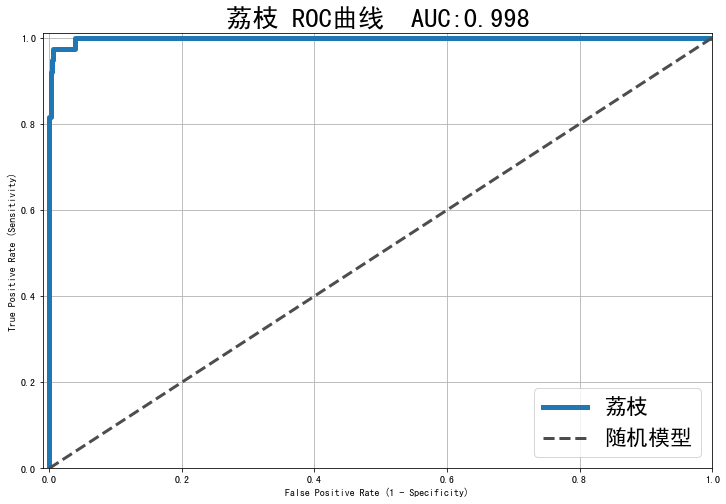

In [13]:
plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, linewidth=5, label=specific_class)
plt.plot([0, 1], [0, 1],ls="--", c='.3', linewidth=3, label='随机模型')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.rcParams['font.size'] = 22
plt.title('{} ROC曲线  AUC:{:.3f}'.format(specific_class, auc(fpr, tpr)))
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend()
plt.grid(True)

plt.savefig('{}-ROC曲线.pdf'.format(specific_class), dpi=120, bbox_inches='tight')
plt.show()

# yticks = ax.yaxis.get_major_ticks()
# yticks[0].label1.set_visible(False)

In [14]:
auc(fpr, tpr)

0.9984311740890688

## 绘制所有类别的ROC曲线

In [15]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

In [16]:
def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

In [17]:
get_line_arg()

{'color': 'seagreen', 'linestyle': '-', 'linewidth': 1}

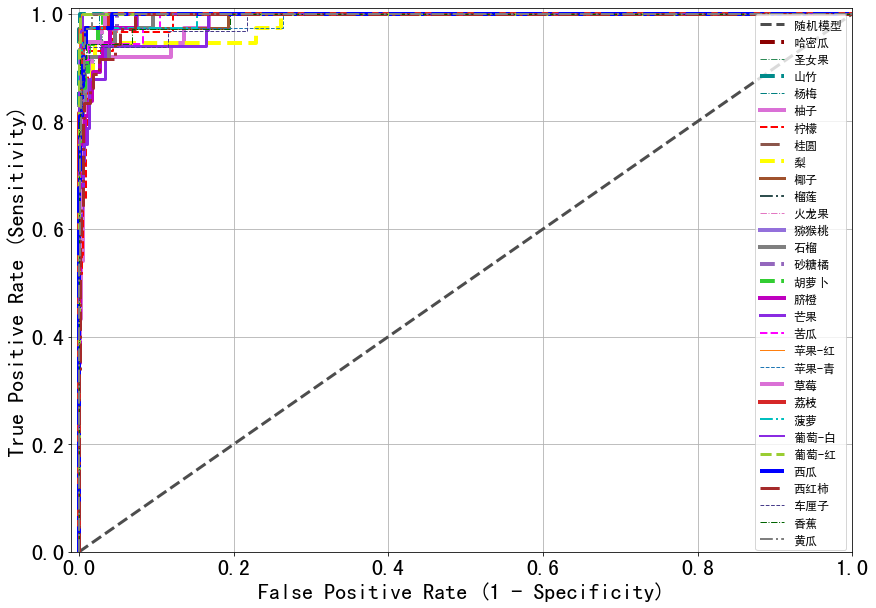

In [18]:
plt.figure(figsize=(14, 10))
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.plot([0, 1], [0, 1],ls="--", c='.3', linewidth=3, label='随机模型')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.rcParams['font.size'] = 22
plt.grid(True)

auc_list = []
for each_class in classes:
    y_test = list((df['标注类别名称'] == each_class))
    y_score = list(df['{}-预测置信度'.format(each_class)])
    fpr, tpr, threshold = roc_curve(y_test, y_score)
    plt.plot(fpr, tpr, **get_line_arg(), label=each_class)
    plt.legend()
    auc_list.append(auc(fpr, tpr))

plt.legend(loc='best', fontsize=12)
plt.savefig('各类别ROC曲线.pdf'.format(specific_class), dpi=120, bbox_inches='tight')
plt.show()

## 将AUC增加至`各类别准确率评估指标`表格中

In [19]:
df_report = pd.read_csv('各类别准确率评估指标.csv')

In [20]:
df_report

,类别,precision,recall,f1-score,support,AP
0,哈密瓜,0.911765,0.837838,0.873239,37.0,0.960852
1,圣女果,0.702128,0.868421,0.776471,38.0,0.867181
2,山竹,0.944444,0.971429,0.957746,35.0,0.998456
3,杨梅,0.916667,0.891892,0.904110,37.0,0.977591
4,柚子,0.833333,0.675676,0.746269,37.0,0.834844
5,柠檬,0.642857,0.931034,0.760563,29.0,0.767079
6,桂圆,0.973684,0.973684,0.973684,38.0,0.999325
7,梨,0.875000,0.756757,0.811594,37.0,0.896257
8,椰子,0.937500,0.789474,0.857143,38.0,0.926248
9,榴莲,0.795455,0.972222,0.875000,36.0,0.972024


In [21]:
# 计算 AUC值 的 宏平均 和 加权平均
macro_avg_auc = np.mean(auc_list)
weighted_avg_auc = sum(auc_list * df_report.iloc[:-2]['support'] / len(df))

In [22]:
auc_list.append(macro_avg_auc)
auc_list.append(weighted_avg_auc)

In [23]:
df_report['AUC'] = auc_list

In [24]:
df_report

,类别,precision,recall,f1-score,support,AP,AUC
0,哈密瓜,0.911765,0.837838,0.873239,37.0,0.960852,0.997637
1,圣女果,0.702128,0.868421,0.776471,38.0,0.867181,0.993978
2,山竹,0.944444,0.971429,0.957746,35.0,0.998456,0.999945
3,杨梅,0.916667,0.891892,0.904110,37.0,0.977591,0.998910
4,柚子,0.833333,0.675676,0.746269,37.0,0.834844,0.985227
5,柠檬,0.642857,0.931034,0.760563,29.0,0.767079,0.990007
6,桂圆,0.973684,0.973684,0.973684,38.0,0.999325,0.999975
7,梨,0.875000,0.756757,0.811594,37.0,0.896257,0.984163
8,椰子,0.937500,0.789474,0.857143,38.0,0.926248,0.992105
9,榴莲,0.795455,0.972222,0.875000,36.0,0.972024,0.998401


In [26]:
df_report.to_csv('work_dirs/mobilenet_v2_1x_fruit30/各类别准确率评估指标.csv', index=False)